In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import openpyxl
import os

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

Reading in the Toolbox outputs and filtering to retain only relevant human health endpoints.

In [4]:
df = pd.read_excel(processed_dir+'toolbox_tsca2.xlsx',sheet_name = 'processed')

In [5]:
df = df[['DTXSID', 'NAME', 'Chemical name(s)',
       'SMILES', 'Molecular formula', 'Predefined substance type',
       'Acute Oral Toxicity', 'Acute aquatic toxicity MOA by OASIS',
       'Acute aquatic toxicity classification by Verhaar (Modified)',
       'Aquatic toxicity classification by ECOSAR',
       'Carcinogenicity (genotox and nongenotox) alerts by ISS', 'DART scheme',
       'DNA alerts for AMES, CA and MNT by OASIS', 'DNA binding by OASIS',
       'DNA binding by OECD', 'Estrogen Receptor Binding',
       'Eye irritation/corrosion Exclusion rules by BfR',
       'Eye irritation/corrosion Inclusion rules by BfR',
       'Keratinocyte gene expression', 'Oncologic Primary Classification',
       'Protein Binding Potency h-CLAT',
       'Protein binding alerts for Chromosomal aberration by OASIS',
       'Protein binding alerts for skin sensitization according to GHS',
       'Protein binding alerts for skin sensitization by OASIS',
       'Protein binding by OASIS', 'Protein binding by OECD',
       'Protein binding potency Cys (DPRA 13%)', 'Protein binding potency GSH',
       'Protein binding potency Lys (DPRA 13%)', 'Respiratory sensitisation',
       'Retinoic Acid Receptor Binding',
       'Skin irritation/corrosion Exclusion rules by BfR',
       'Skin irritation/corrosion Inclusion rules by BfR', 
       'Toxic hazard classification by Cramer', 'Uncouplers (MITOTOX)',
       'in vitro mutagenicity (Ames test) alerts by ISS',
       'in vivo mutagenicity (Micronucleus) alerts by ISS',
       'rtER Expert System - USEPA']]

In [6]:
mycols = df.columns.tolist()

In [7]:
mycols = [e for e in mycols[6:] if   ('aquatic' not in e) and ('Aquatic' not in e)]

In [8]:
df1 = df.set_index('DTXSID')

In [9]:
def create_binary_columns(df):
    binary_data = {}
    for col in df.columns:
        if col != 'NAME':
            for val in df[col].unique():
                if pd.notna(val):
                    col_name = (col, val)
                    binary_data[col_name] = (df[col] == val).astype(int)
    return pd.DataFrame(binary_data)

In [10]:
df2 = create_binary_columns(df1[mycols])

In [11]:
df2.columns = [str(col) for col in df2.columns]

Created a binary representation of all alert-endpoint combinations as columns, rows are chemicals and cells are populated 1,0, np.nan to indicate presence or absence of that alert-endpoint combination for a chemical.

In [12]:
df2.to_csv(interim_dir+'tb_binary_080624.csv')

In [13]:
df_1 = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data')

In [14]:
df_1['group_str'].nunique()

180

In [15]:
mydict = {k:v for k,v in zip(df_1['dtxsid'],df_1[ 'group_str'])}
selections = {k:v for k,v in zip(df_1['dtxsid'],df_1[ 'final_picks']) }

In [16]:
tb = (df2.reset_index()
 .assign(group_str = df2.reset_index()['DTXSID'].replace(mydict ))
 )


In [17]:
#tb

In [18]:

tb1 = (tb.assign(final_picks = tb['DTXSID'].replace(selections)))
tb1

,DTXSID,"('Acute Oral Toxicity', 'Not categorized')","('Acute Oral Toxicity', 'alpha,beta-Unsaturated carboxylic acid esters')","('Acute Oral Toxicity', 'Naphthol derivatives')","('Acute Oral Toxicity', 'ortho- and para-Phenylenediamines')","('Acute Oral Toxicity', 'Basic toxicity')","('Acute Oral Toxicity', 'N-Alkylated aliphatic amides')","('Acute Oral Toxicity', 'Benzo(naphtho-)quinones and quinone imines without H atom in the quinone ring')","('Acute Oral Toxicity', 'alpha,beta-Unsaturated aldehydes')","('Acute Oral Toxicity', 'Acrylic acid esters')",...,"('rtER Expert System - USEPA', '(N/A)')","('rtER Expert System - USEPA', 'Alkylcyclohexanols')","('rtER Expert System - USEPA', '4-Alkoxyanilines')","('rtER Expert System - USEPA', '4-Alkylanilines')","('rtER Expert System - USEPA', 'Thiophosphate Esters')","('rtER Expert System - USEPA', 'Mixed Organics')","('rtER Expert System - USEPA', 'Gallates')","('rtER Expert System - USEPA', 'Tamoxifen-Like compounds')",group_str,final_picks
0,DTXSID3060164,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Triphenyl compounds', nan)",NaN
1,DTXSID7060837,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organohalogen compounds', 1.0)",NaN
2,DTXSID9025879,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Phenylpropanoids and polyketides', 2.0)",NaN
3,DTXSID2026282,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Anthracenes', 2.0)",NaN
4,DTXSID4052188,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organooxygen compounds', 3.0)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,DTXSID9063956,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organometallic compounds', 3.0)",NaN
12081,DTXSID7065546,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Phenylpropanoids and polyketides', 2.0)",NaN
12082,DTXSID7062873,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Fatty Acyls', 2.0)",NaN
12083,DTXSID9040342,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organic carbonic acids and derivatives', 2.0)",NaN


In [19]:
tb1.final_picks.value_counts()

1.0    276
Name: final_picks, dtype: int64

In [26]:
len([e for e in tb1.columns if "Not" in e])

12

In [25]:
len([e for e in tb1.columns if "No alert" in e])

14

In [38]:
[e for e in tb1.columns if ("Undefined" in e) and ('Eye' not in e) and ('Skin' not in e)]

["('Protein binding alerts for Chromosomal aberration by OASIS', 'Undefined')",
 "('Protein binding alerts for skin sensitization by OASIS', 'Undefined')",
 "('Protein binding alerts for skin sensitization by OASIS', 'Acylation >> Direct acylation involving a leaving group;Acylation >> Direct acylation involving a leaving group >> Carbamates;Undefined')",
 "('Protein binding alerts for skin sensitization by OASIS', 'Michael Addition;Michael Addition >> Michael addition on conjugated systems with electron withdrawing group;Michael Addition >> Michael addition on conjugated systems with electron withdrawing group >> alpha,beta-Carbonyl compounds with polarized double bonds;Michael Addition >> Michael addition on quinoid type compounds;Michael Addition >> Michael addition on quinoid type compounds >> Quinone methide(s)/imines; Quinoide oxime structure; Nitroquinones, Naphthoquinone(s)/imines;Undefined')",
 "('Protein binding alerts for skin sensitization by OASIS', 'SN2 >> Ring opening SN

In [48]:
bfr = [e for e in tb1.columns if ("Exclusion" in e) ]

In [24]:
to_drop = [e for e in tb1.columns if ("No alert")  in e or ("Not" in e)]

In [42]:
to_drop = to_drop + ["('Protein binding alerts for Chromosomal aberration by OASIS', 'Undefined')",
 "('Protein binding alerts for skin sensitization by OASIS', 'Undefined')","('Uncouplers (MITOTOX)', 'Undefined')",
 "('rtER Expert System - USEPA', 'Undefined')"] + [e for e in tb1.columns if ("N/A" in e) ]

In [50]:
to_drop = to_drop + bfr

In [75]:
to_drop = to_drop + ["('Eye irritation/corrosion Inclusion rules by BfR', 'Inclusion rules not met')",
       "('Skin irritation/corrosion Inclusion rules by BfR', 'Inclusion rules not met')",]

In [51]:
def alert_count(df):
    counts = []
    for col in df.columns[:-2]:
        counts.append([col, df[col].sum()])
    return pd.DataFrame(counts, columns=['endpoint-alert', 'Count'])

In [76]:
res = (tb1
 .set_index('DTXSID')
 .pipe(alert_count)
.sort_values('Count', ascending = False)

)



In [77]:
res1 = (
    res
    .loc[~res['endpoint-alert'].isin(to_drop)]
)

How many unique combinations but from how many unique "endpoints"?
Need to convert the str versions of tuples based to tuples

In [63]:
import ast

There are 26 unique profilers

In [78]:
list(set([ast.literal_eval(t)[0] for t in res1['endpoint-alert']]))

['Estrogen Receptor Binding',
 'Carcinogenicity (genotox and nongenotox) alerts by ISS',
 'Acute Oral Toxicity',
 'DNA alerts for AMES, CA and MNT by OASIS',
 'Toxic hazard classification by Cramer',
 'DNA binding by OECD',
 'Protein Binding Potency h-CLAT',
 'Protein binding by OASIS',
 'rtER Expert System - USEPA',
 'Protein binding potency Cys (DPRA 13%)',
 'Respiratory sensitisation',
 'DNA binding by OASIS',
 'Protein binding alerts for Chromosomal aberration by OASIS',
 'Keratinocyte gene expression',
 'Oncologic Primary Classification',
 'in vitro mutagenicity (Ames test) alerts by ISS',
 'Protein binding alerts for skin sensitization according to GHS',
 'Protein binding potency Lys (DPRA 13%)',
 'DART scheme',
 'Protein binding alerts for skin sensitization by OASIS',
 'Protein binding potency GSH',
 'Protein binding by OECD',
 'Skin irritation/corrosion Inclusion rules by BfR',
 'Eye irritation/corrosion Inclusion rules by BfR',
 'in vivo mutagenicity (Micronucleus) alerts by 

In [80]:
res1['endpoint-alert'].nunique()


2796

In [93]:
subset =  (
    tb1
    .loc[tb1['final_picks'] == 1]
    .set_index('DTXSID')
    .pipe(alert_count)
    .loc[lambda df: ~df['endpoint-alert'].isin(to_drop)]
    .sort_values('Count', ascending=False)
     .loc[lambda df: df['Count'] >0]
)

In [94]:
list(set([ast.literal_eval(t)[0] for t in subset['endpoint-alert']]))

['Estrogen Receptor Binding',
 'Carcinogenicity (genotox and nongenotox) alerts by ISS',
 'Acute Oral Toxicity',
 'DNA alerts for AMES, CA and MNT by OASIS',
 'Toxic hazard classification by Cramer',
 'DNA binding by OECD',
 'Protein Binding Potency h-CLAT',
 'Protein binding by OASIS',
 'rtER Expert System - USEPA',
 'Protein binding potency Cys (DPRA 13%)',
 'Respiratory sensitisation',
 'DNA binding by OASIS',
 'Protein binding alerts for Chromosomal aberration by OASIS',
 'Keratinocyte gene expression',
 'Oncologic Primary Classification',
 'in vitro mutagenicity (Ames test) alerts by ISS',
 'Protein binding alerts for skin sensitization according to GHS',
 'Protein binding potency Lys (DPRA 13%)',
 'DART scheme',
 'Protein binding alerts for skin sensitization by OASIS',
 'Protein binding potency GSH',
 'Protein binding by OECD',
 'Skin irritation/corrosion Inclusion rules by BfR',
 'Eye irritation/corrosion Inclusion rules by BfR',
 'in vivo mutagenicity (Micronucleus) alerts by 

In [97]:
tb1.drop(to_drop, axis = 1, inplace = True)

In [125]:
tb1 = tb1.set_index('DTXSID')

In [126]:
for i, group in tb1.groupby('group_str'):
    print(group.iloc[:, :-2].shape)
    break

(33, 2796)


In [127]:
results = {}
for i, group in tb1.groupby('group_str'):
    results[i] = group.iloc[:,:-2]


In [128]:
results["('Acetylides', nan)"]

,"('Acute Oral Toxicity', 'alpha,beta-Unsaturated carboxylic acid esters')","('Acute Oral Toxicity', 'Naphthol derivatives')","('Acute Oral Toxicity', 'ortho- and para-Phenylenediamines')","('Acute Oral Toxicity', 'Basic toxicity')","('Acute Oral Toxicity', 'N-Alkylated aliphatic amides')","('Acute Oral Toxicity', 'Benzo(naphtho-)quinones and quinone imines without H atom in the quinone ring')","('Acute Oral Toxicity', 'alpha,beta-Unsaturated aldehydes')","('Acute Oral Toxicity', 'Acrylic acid esters')","('Acute Oral Toxicity', 'Hydroxy- and alkoxy-substituted benzaldehydes')","('Acute Oral Toxicity', 'Primary benzylic type halides')",...,"('rtER Expert System - USEPA', 'Parabens')","('rtER Expert System - USEPA', 'Phenylphenols')","('rtER Expert System - USEPA', '2-;4-; or2,4,6-Benzoates')","('rtER Expert System - USEPA', 'Alkylcyclohexanols')","('rtER Expert System - USEPA', '4-Alkoxyanilines')","('rtER Expert System - USEPA', '4-Alkylanilines')","('rtER Expert System - USEPA', 'Thiophosphate Esters')","('rtER Expert System - USEPA', 'Mixed Organics')","('rtER Expert System - USEPA', 'Gallates')","('rtER Expert System - USEPA', 'Tamoxifen-Like compounds')"
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID30870753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID7062374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9061097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1061233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4061096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8072405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID0066955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6026379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID7060835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
import sys

In [130]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [131]:
from model_functions import *

In [132]:
import seaborn as sns

In [133]:
results["('Acetylides', nan)"].columns

Index(['('Acute Oral Toxicity', 'alpha,beta-Unsaturated carboxylic acid esters')',
       '('Acute Oral Toxicity', 'Naphthol derivatives')',
       '('Acute Oral Toxicity', 'ortho- and para-Phenylenediamines')',
       '('Acute Oral Toxicity', 'Basic toxicity')',
       '('Acute Oral Toxicity', 'N-Alkylated aliphatic amides')',
       '('Acute Oral Toxicity', 'Benzo(naphtho-)quinones and quinone imines without H atom in the quinone ring')',
       '('Acute Oral Toxicity', 'alpha,beta-Unsaturated aldehydes')',
       '('Acute Oral Toxicity', 'Acrylic acid esters')',
       '('Acute Oral Toxicity', 'Hydroxy- and alkoxy-substituted benzaldehydes')',
       '('Acute Oral Toxicity', 'Primary benzylic type halides')',
       ...
       '('rtER Expert System - USEPA', 'Parabens')',
       '('rtER Expert System - USEPA', 'Phenylphenols')',
       '('rtER Expert System - USEPA', '2-;4-; or2,4,6-Benzoates')',
       '('rtER Expert System - USEPA', 'Alkylcyclohexanols')',
       '('rtER Expert Sy

In [134]:
dists = {}
for k, v in results.items():
    dists[k] = distance_matrix(v)

In [136]:
import pickle
pickle.dump( dists, open(interim_dir+ "dists_toolbx_250624.pkl", "wb" ) )


<Axes: xlabel='DTXSID', ylabel='DTXSID'>

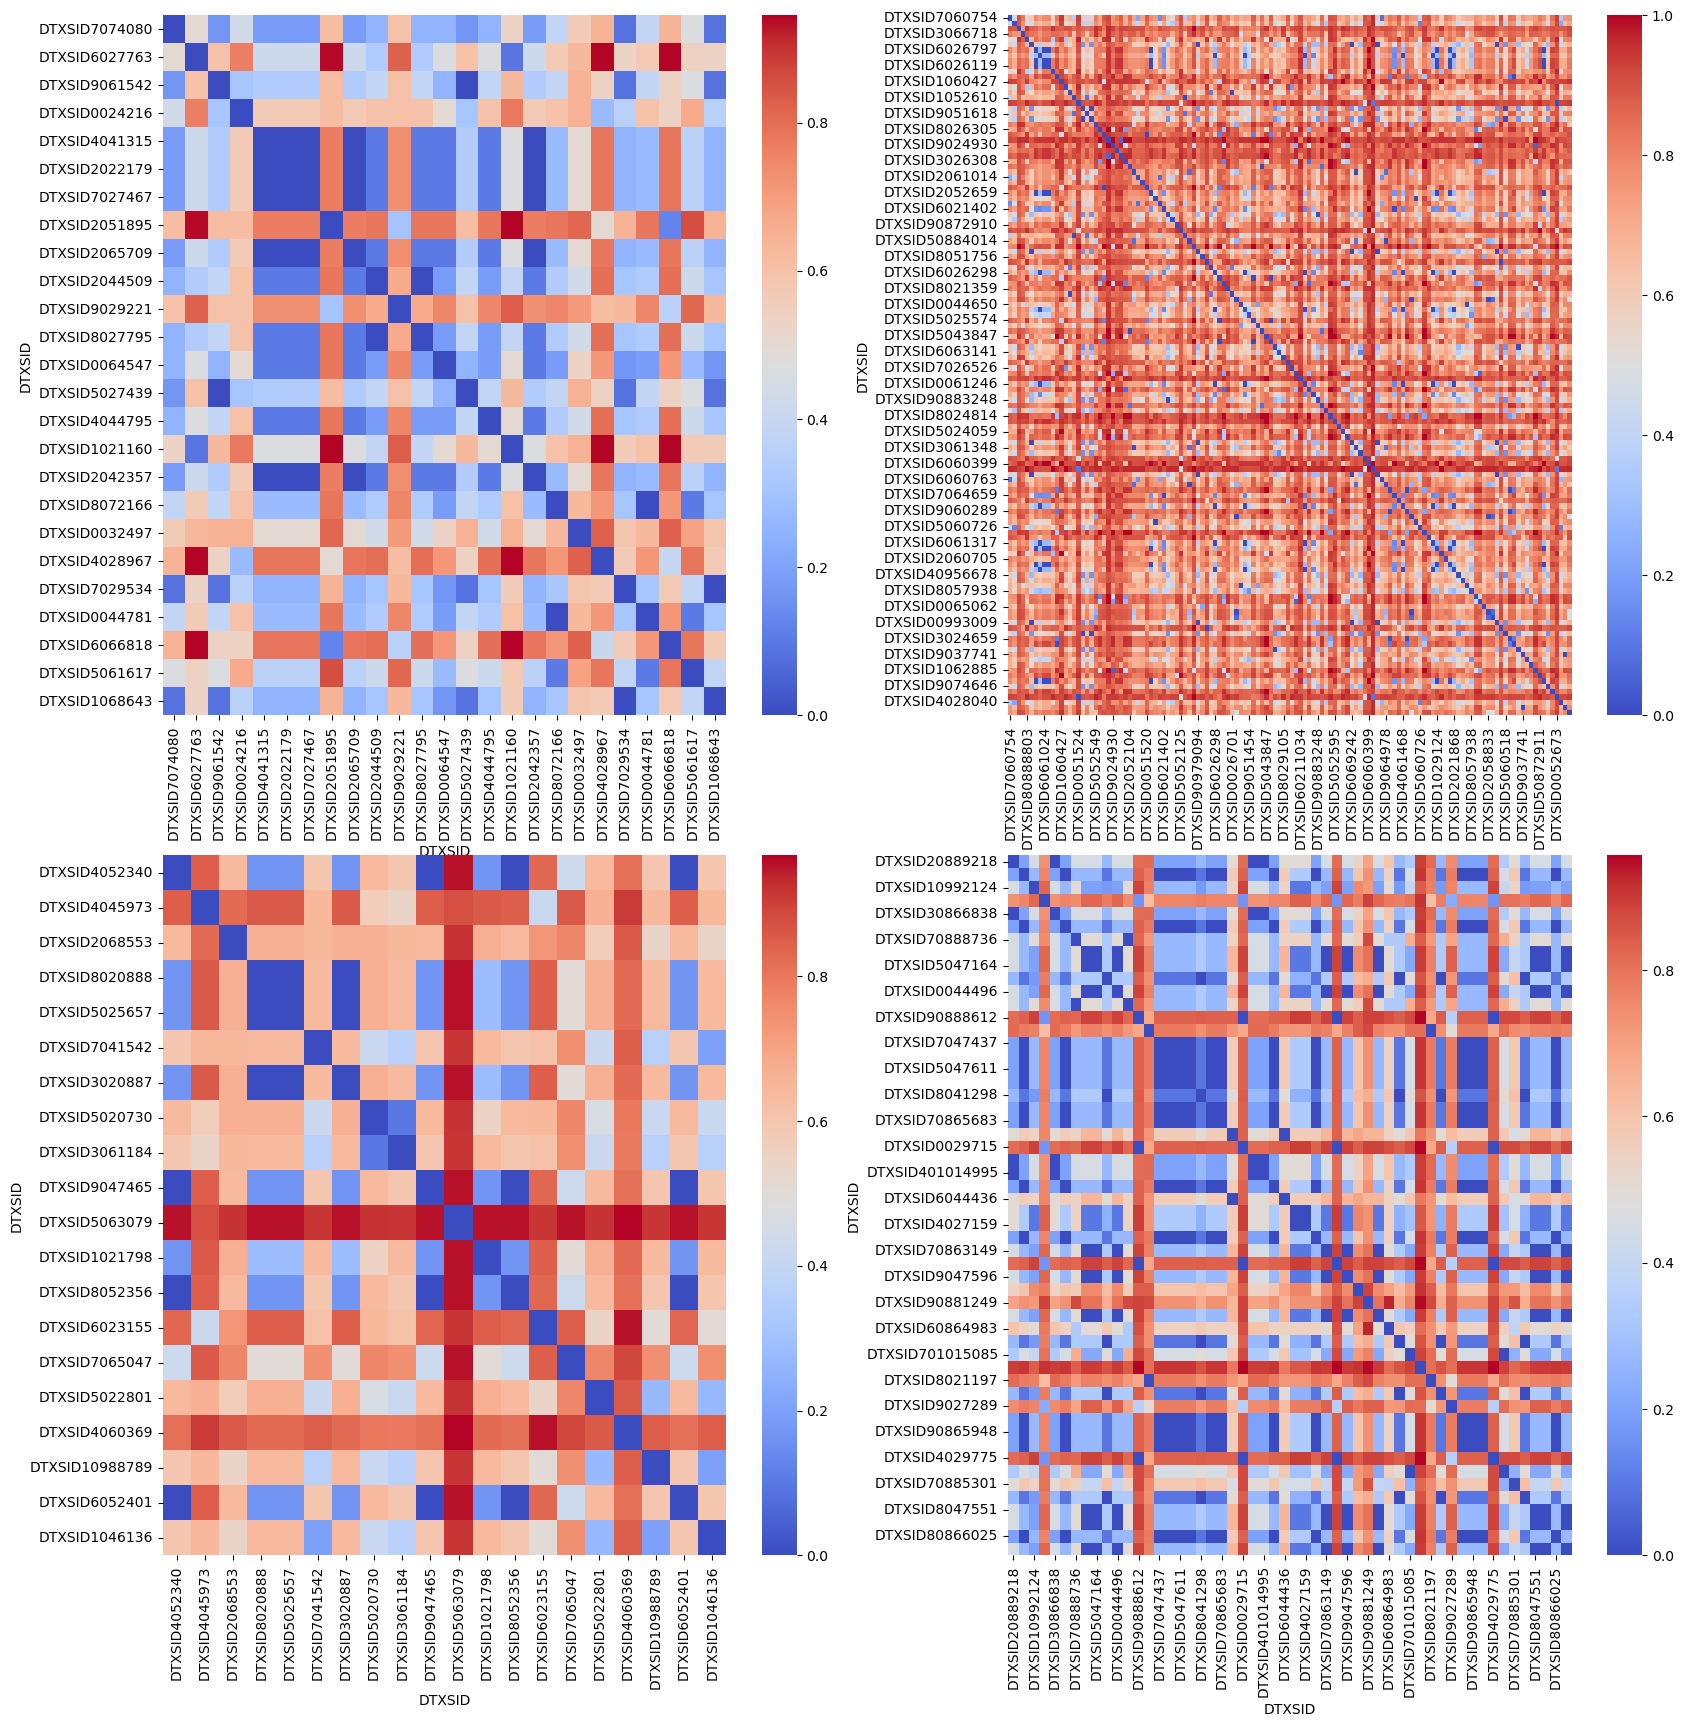

In [135]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])

In [137]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(dists["('Pyridines and derivatives', 1.0)"]), method='ward')

In [138]:
test = dists["('Pyridines and derivatives', 1.0)"] 


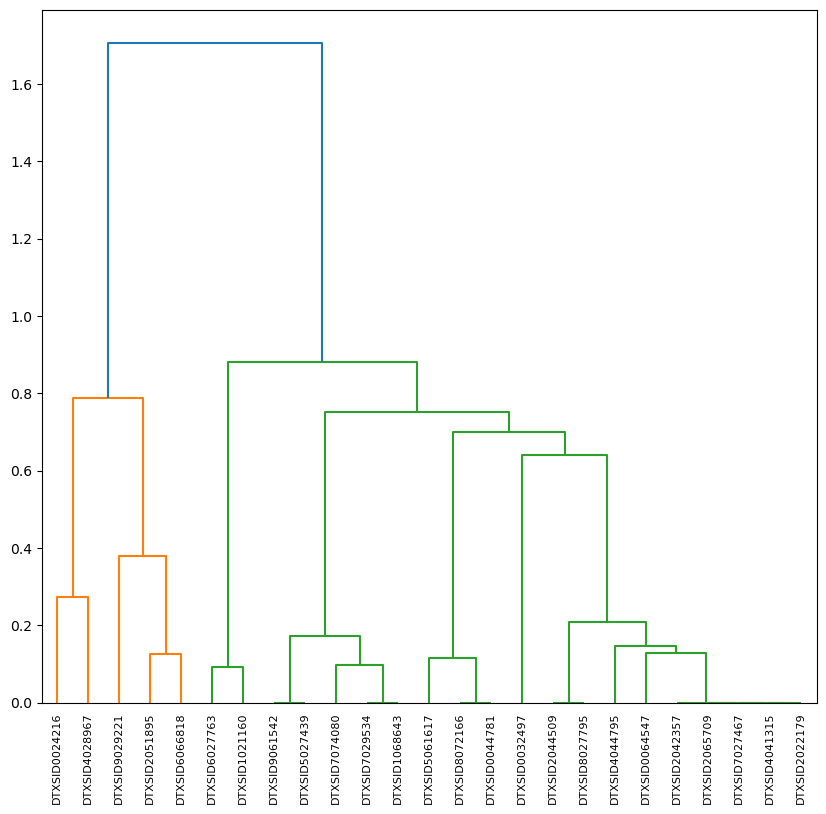

In [139]:
plt.figure(figsize=(10, 9))
dendrogram(
    linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = test.index# font size for the x axis labels
)
plt.show()